In [113]:
cd raw_data

[Errno 2] No such file or directory: 'raw_data'
/home/ramin/code/Dhart68/sun-shade/raw_data


In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [179]:
df=pd.read_csv('Data_40.84009091671339_-73.84896868172781_100_all_days.csv')

In [180]:
df.head()

,Unnamed: 0,latitude,longitude,distance,date,time,month,roof,sunshadow,daylight_hour,energy_absorbed,radiation
0,0,40.840091,-73.848969,100,1/3/2021,t1,Jan,1,5.331413,9.331305,0.245679,0.43
1,1,40.840091,-73.848969,100,1/10/2021,t2,Jan,1,5.456717,9.456615,1.575282,2.73
2,2,40.840091,-73.848969,100,1/17/2021,t3,Jan,1,6.627706,9.627610,1.679711,2.44
3,3,40.840091,-73.848969,100,1/24/2021,t4,Jan,1,6.837618,9.837532,2.251976,3.24
4,4,40.840091,-73.848969,100,1/31/2021,t5,Jan,1,6.079305,10.079229,0.784097,1.30


In [191]:
df['dates'] = df['date'].apply(lambda x: x.strftime('%B-%d'))

In [190]:
df['date']=pd.to_datetime(df['date'])

In [192]:
df.dates

0       January-03
1       January-10
2       January-17
3       January-24
4       January-31
5      February-07
6      February-14
7      February-21
8      February-28
9         March-07
10        March-14
11        March-21
12        March-28
13        April-04
14        April-11
15        April-18
16        April-25
17          May-02
18          May-09
19          May-16
20          May-23
21          May-30
22         June-06
23         June-13
24         June-20
25         June-27
26         July-04
27         July-11
28         July-18
29         July-25
30       August-01
31       August-08
32       August-15
33       August-22
34       August-29
35    September-05
36    September-12
37    September-19
38    September-26
39      October-03
40      October-10
41      October-17
42      October-24
43      October-31
44     November-07
45     November-14
46     November-21
47     November-28
48     December-05
49     December-12
50     December-19
51     December-26
Name: dates,

In [ ]:
df['Cum_energy_absobed']=df.energy_absorbed.cumsum(axis = 0)

/tmp/ipykernel_22222/1206586557.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


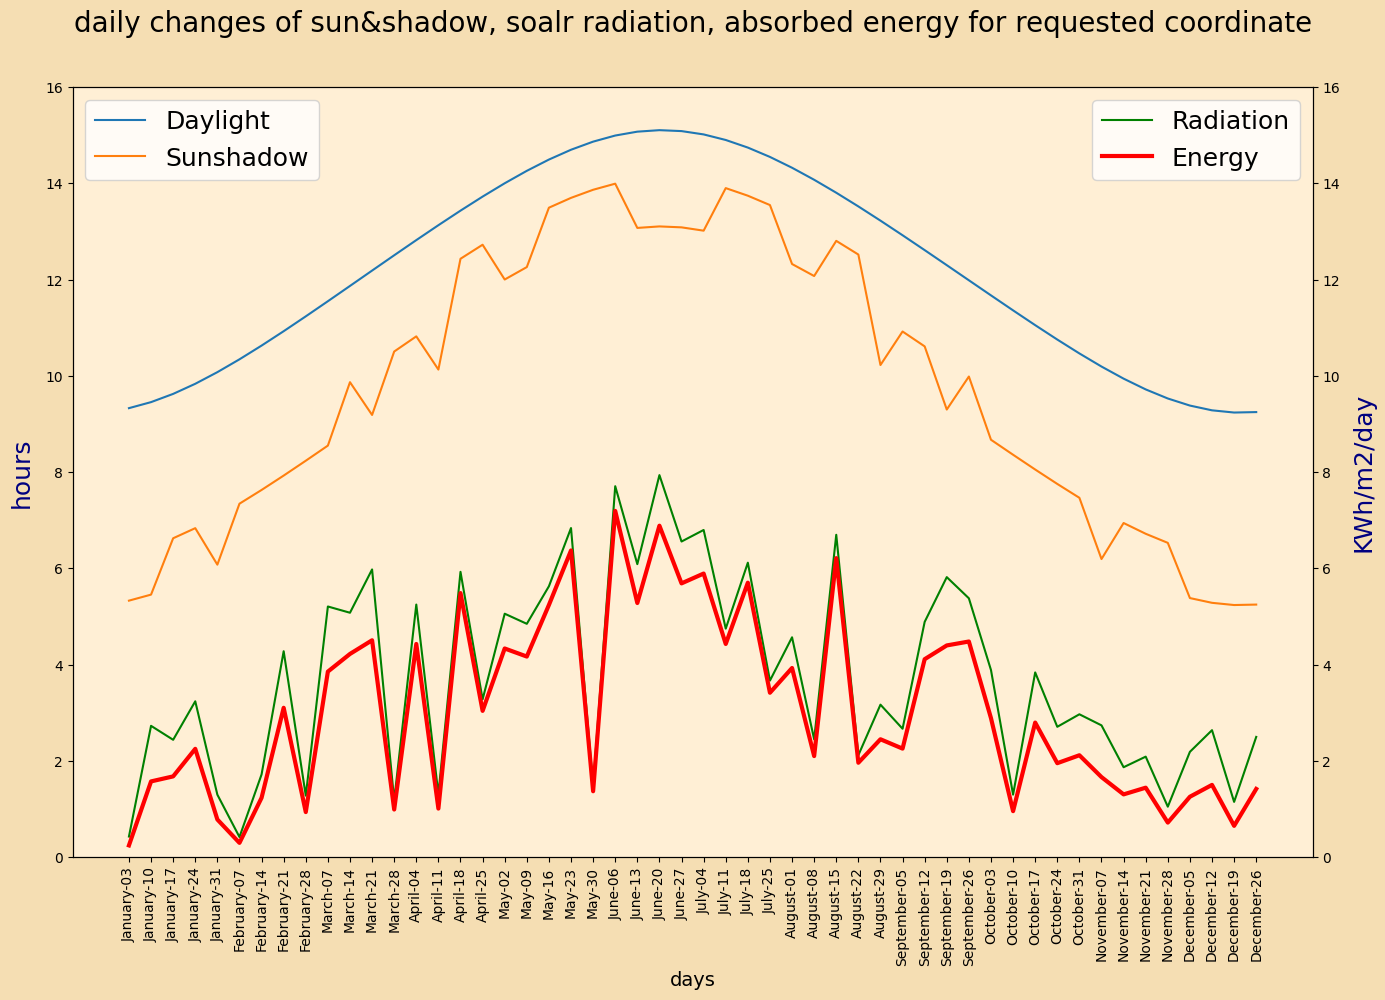

In [195]:
x = df.dates
y = df.energy_absorbed
fig,ax=plt.subplots(figsize=(16, 10)) #fig, ax = plt.subplots(2, 2, figsize=(8,6))

# plot lines
ax.set_facecolor('papayawhip')
fig.patch.set_facecolor('wheat')
ax.plot(x, df.daylight_hour, label = "Daylight")
ax.plot(x, df.sunshadow, label = "Sunshadow")
ax.set_title('daily changes of sun&shadow, soalr radiation, absorbed energy for requested coordinate',fontsize = 20, pad=40)
ax.set_xlabel("days", fontsize = 14)
ax.set_ylabel("hours", fontsize=18, labelpad=8,color='navy')
ax.set_ylim(0, 16)

ax.set_xticklabels(x, rotation=90)
ax.legend(loc='upper left',fontsize=18)
ax2=ax.twinx()
ax2.plot(x, df.radiation, label = "Radiation",color='green')
ax2.plot(x, y, label = "Energy",color='red',linewidth=3)
ax2.set_ylim(0, 16)
ax2.set_ylabel("KWh/m2/day", fontsize=18, labelpad=8, color='navy')
ax2.legend(fontsize=18)
plt.show()

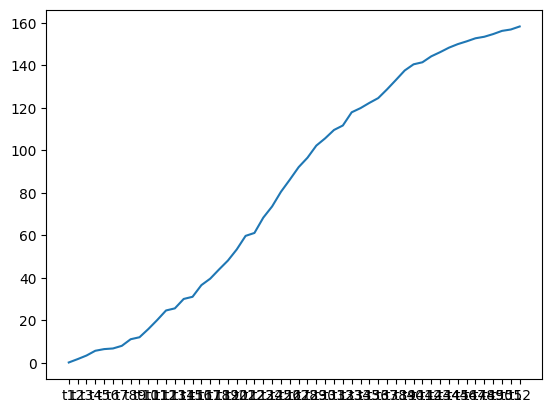

In [ ]:
plt.plot(x, df['Cum_energy_absobed'], label = "Cumulative energy per year")